Heat Production per Isotope: [5.301000e-17 3.304125e-17 6.472710e-17]
Total Heat Production: 1.5077835e-16


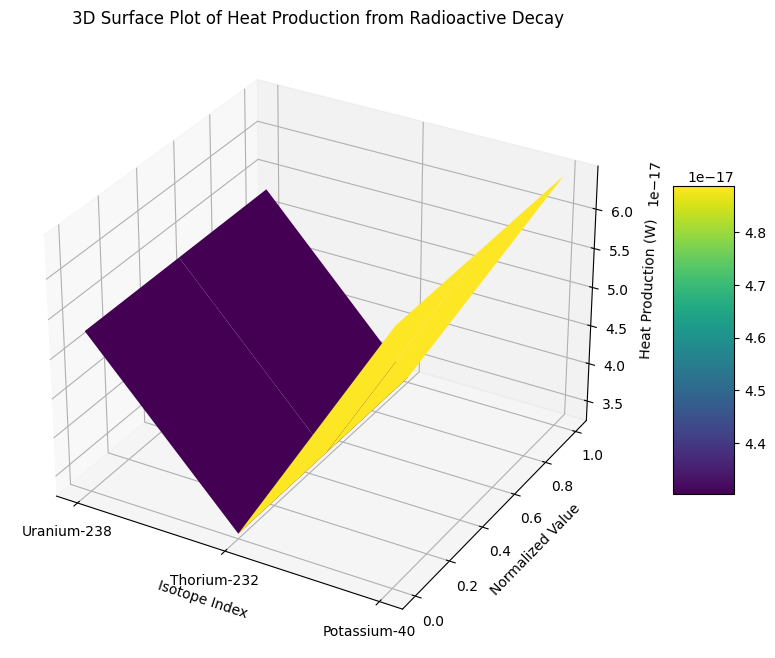

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Define Data Parameters
isotopes = ['Uranium-238', 'Thorium-232', 'Potassium-40']
flux = np.array([1.2e6, 2.5e6, 0.9e6])  # Flux in neutrinos per cm² per s
decay_rates = np.array([1.55e-11, 4.95e-12, 5.49e-11])  # Decay constants (s⁻¹)
energy_released = np.array([2.85e-12, 2.67e-12, 1.31e-12])  # Energy released per decay (Joules)

# 2. Calculate Heat Production
def calculate_heat_production(flux, decay_rates, energy_released):
    heat_production = flux * decay_rates * energy_released
    total_heat_production = np.sum(heat_production)
    return heat_production, total_heat_production

heat_production, total_heat_production = calculate_heat_production(flux, decay_rates, energy_released)

# Print heat production values
print("Heat Production per Isotope:", heat_production)
print("Total Heat Production:", total_heat_production)

# 3. Prepare Data for 3D Plot
# Create meshgrid for X and Y axes
x = np.linspace(0, len(isotopes)-1, len(isotopes))
y = np.linspace(0, 1, len(isotopes))
x, y = np.meshgrid(x, y)

# Extend isotopes to a 3D surface plot
z = np.zeros_like(x)

for i in range(len(isotopes)):
    z[:, i] = heat_production[i] * np.ones_like(x[:, i])

# 4. Create 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Add color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# 5. Customize Plot
ax.set_xlabel('Isotope Index')
ax.set_ylabel('Normalized Value')
ax.set_zlabel('Heat Production (W)')
ax.set_title('3D Surface Plot of Heat Production from Radioactive Decay')

# Set X-ticks to show isotope names
ax.set_xticks(np.arange(len(isotopes)))
ax.set_xticklabels(isotopes)

# 6. Display Plot
plt.show()